# Iris

# Import required libraries



In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data

In [2]:
iris = pd.read_csv("Iris Dataset.csv") #load the dataset

In [3]:
iris.head(2) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


# Data Analysis

Checking if there is any inconsistency in the dataset and as we see there are no null values in the dataset, so the data can be processed

In [4]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Removing the unneeded column

In [5]:
iris.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

# Exploratory Data Analysis With Iris
Data vizualization

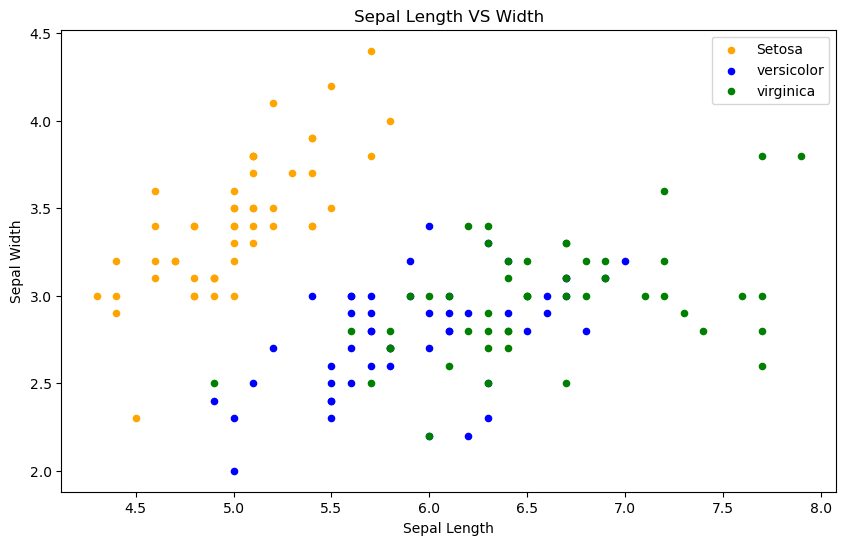

In [6]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

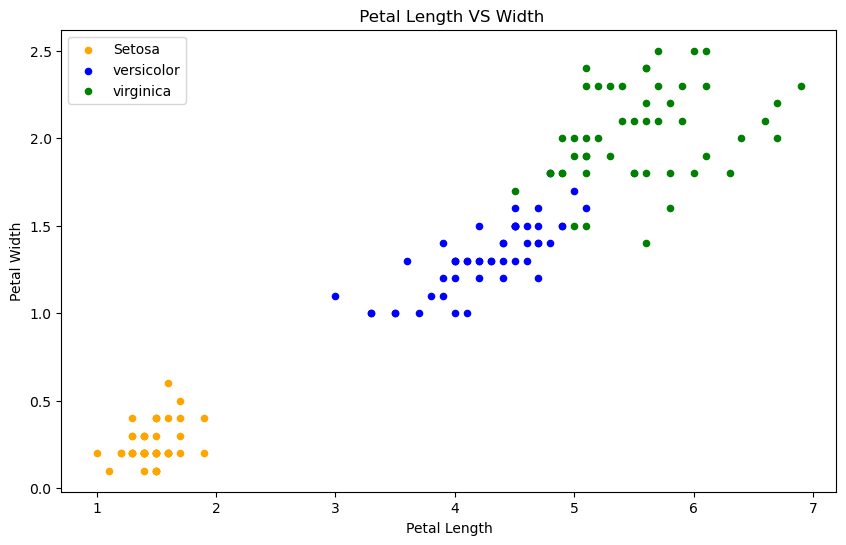

In [7]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

We can see that the Petal Features are giving a better cluster division compared to the Sepal features. This shows that the Petals can help in better and accurate Predictions over the Sepal.

### Now let us see how are the length and width are distributed

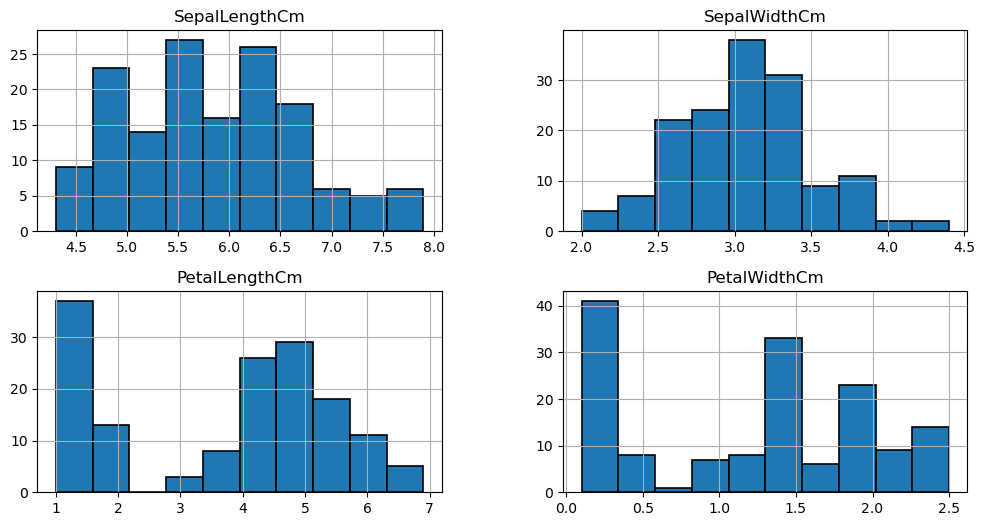

In [8]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Now let us see how the length and width vary according to the species

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

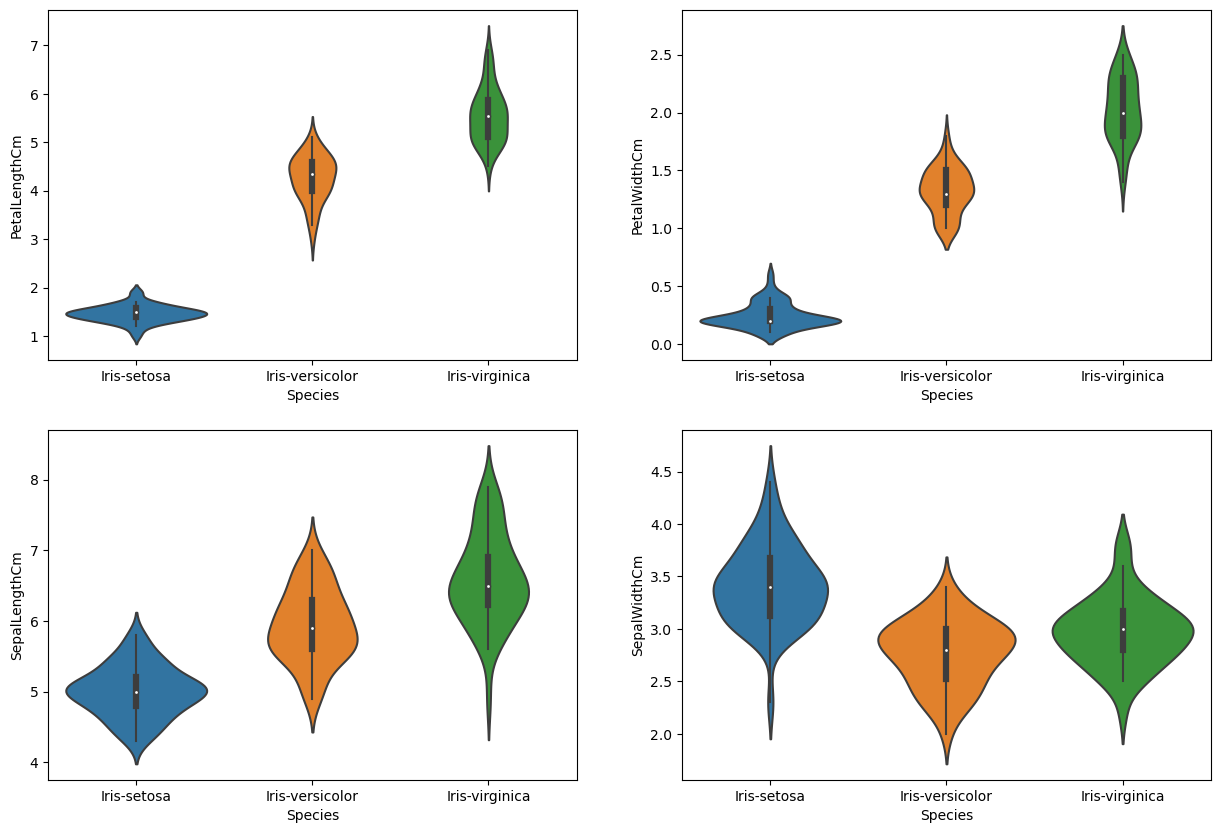

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

In [11]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [12]:
iris.shape #get the shape of the dataset

(150, 5)

C:\Users\SHASH\AppData\Local\Temp\ipykernel_31944\3758379432.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())


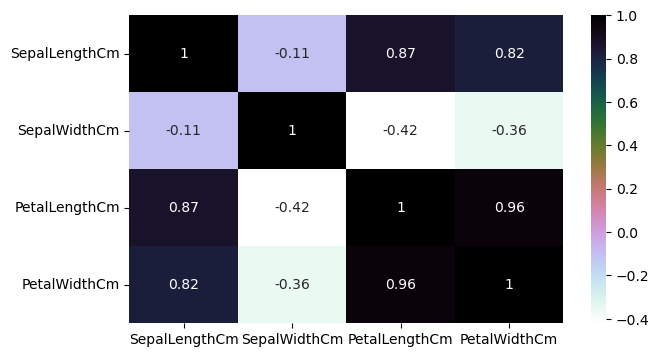

In [13]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# Splitting The Data into Training And Testing Dataset

In [14]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [15]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

Lets check the Train and Test Dataset

In [16]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
76,6.8,2.8,4.8,1.4
66,5.6,3.0,4.5,1.5


In [17]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
63,6.1,2.9,4.7,1.4
100,6.3,3.3,6.0,2.5


In [18]:
train_y.head()  ##output of the training data

76     Iris-versicolor
66     Iris-versicolor
20         Iris-setosa
72     Iris-versicolor
141     Iris-virginica
Name: Species, dtype: object

# K-Means Clustering

In [19]:
class KMeans:
    def __init__(self, n_clusters=2, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.centroids = None

    def fit(self, X):
        # Randomly initialize centroids
        self.centroids = X[np.random.choice(range(X.shape[0]), size=self.n_clusters, replace=False)]

        # Iterate until convergence or maximum iterations reached
        for _ in range(self.max_iterations):
            # Assign each data point to the nearest centroid
            labels = self.assign_labels(X)

            # Update centroids
            new_centroids = self.update_centroids(X, labels)

            # Check convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def assign_labels(self, X):
        labels = []
        for x in X:
            distances = np.linalg.norm(self.centroids - x, axis=1)
            label = np.argmin(distances)
            labels.append(label)
        return np.array(labels)

    def update_centroids(self, X, labels):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            centroid = np.mean(cluster_points, axis=0)
            new_centroids.append(centroid)
        return np.array(new_centroids)

In [23]:
model=KMeans(n_clusters=2, max_iterations=100) 
model.fit(train_X)
prediction=model.predict(test_X)
print('The accuracy of the K means clustering is',metrics.accuracy_score(prediction,test_y)*100)

The accuracy of the K means clustering is 97.77777777777777


# Principal Component Analysis

In [24]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Compute mean of the data
        self.mean = np.mean(X, axis=0)

        # Center the data
        X_centered = X - self.mean

        # Calculate the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Sort the eigenvalues and eigenvectors in descending order
        indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[indices]
        sorted_eigenvectors = eigenvectors[:, indices]

        # Select the top n_components eigenvectors
        self.components = sorted_eigenvectors[:, :self.n_components]

    def transform(self, X):
        # Center the data
        X_centered = X - self.mean

        # Project the data onto the principal components
        transformed_data = np.dot(X_centered, self.components)

        return transformed_data

In [26]:
pca = PCA(n_components=2)

# Fit the model on the data
pca.fit(train_X)

# Transform the data onto the principal components
transformed_X = pca.transform(train_X)

print("Original Data:")
print(train_X)
print("Transformed Data:")
print(transformed_X)

Original Data:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
76             6.8           2.8            4.8           1.4
66             5.6           3.0            4.5           1.5
20             5.4           3.4            1.7           0.2
72             6.3           2.5            4.9           1.5
141            6.9           3.1            5.1           2.3
..             ...           ...            ...           ...
67             5.8           2.7            4.1           1.0
69             5.6           2.5            3.9           1.1
142            5.8           2.7            5.1           1.9
94             5.6           2.7            4.2           1.3
18             5.7           3.8            1.7           0.3

[105 rows x 4 columns]
Transformed Data:
[[ 1.26578244 -0.2421056 ]
 [ 0.60415013  0.35546874]
 [-2.37818809 -0.33525086]
 [ 1.24100859  0.32852552]
 [ 1.85183688 -0.41922979]
 [ 1.38468134  0.13857426]
 [ 2.20791174 -0.35628981]
 [ 0.31901